In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time

iris = np.loadtxt('iris.txt')

######## DO NOT MODIFY THIS FUNCTION ########
def draw_rand_label(x, label_list):
    seed = abs(np.sum(x))
    while seed < 1:
        seed = 10 * seed
    seed = int(1000000 * seed)
    np.random.seed(seed)
    return np.random.choice(label_list)
#############################################


In [49]:

class Q1:

    def feature_means(self, iris):
        return np.mean(iris[:,:-1],axis=0)

    def covariance_matrix(self, iris):
        return np.cov(iris.transpose()[:-1])

    def feature_means_class_1(self, iris):
        return np.mean(iris[iris[:,-1]==1,:-1],axis=0)

    def covariance_matrix_class_1(self, iris):
        return np.cov(iris[iris[:,-1]==1,:-1].transpose())

def minkowski_mat(x, Y, p=2):
    return (np.sum((np.abs(x - Y)) ** p, axis=1)) ** (1.0 / p)

class HardParzen:
    def __init__(self, h):
        self.h = h

    def train(self, train_inputs, train_labels):
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        self.label_list = np.unique(train_labels)
        self.n_classes = len(self.label_list)

    # The prediction function takes as input test_data and returns an array containing the predicted classes.
    def compute_predictions(self, test_data):
        # Initialization of the count matrix and the predicted classes array
        num_test = test_data.shape[0]
        classes_pred = np.zeros(num_test)
        dist = np.zeros(num_test)

        for (i, ex) in enumerate(test_data):
            counts = np.zeros((num_test, self.n_classes))
            dist = minkowski_mat(ex, self.train_inputs)
            ind_neighb = [i for (i, pts) in enumerate(self.train_inputs) if dist[i] < self.h]
            if ind_neighb == []:
                classes_pred[i] = draw_rand_label(ex,self.label_list)
            else:
                for j in ind_neighb:
                    counts[i, int(self.train_labels[j]) - 1] += 1

                classes_pred[i] = self.label_list[np.argmax(counts[i, :])]

        return classes_pred

def Kernel(x,Xi,sigma):
    return np.exp(-1/(2*sigma**2)*minkowski_mat(x,Xi)**2)

class SoftRBFParzen:
    def __init__(self, sigma):
        self.sigma  = sigma

    def train(self, train_inputs, train_labels):
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        self.label_list = np.unique(train_labels)
        self.n_classes = len(self.label_list)

    def compute_predictions(self, test_data):
        num_test = test_data.shape[0]
        classes_pred = np.zeros(num_test)
        kernel = np.zeros(num_test)

        for (i, ex) in enumerate(test_data):
            kernel = Kernel(ex, self.train_inputs,self.sigma)
            classes_pred[i]=self.label_list[np.argmax([sum(kernel[self.train_labels==label]) for label in self.label_list])]

        return classes_pred

def split_dataset(iris):
    train=np.array([iris[i] for i in range(iris.shape[0]) if i%5 in {0,1,2}])
    validation=np.array([iris[i] for i in range(iris.shape[0]) if i%5 == 3])
    test=np.array([iris[i] for i in range(iris.shape[0]) if i%5 == 4])
    return tuple([train,validation,test])

In [50]:
class ErrorRate:
    def __init__(self, x_train, y_train, x_val, y_val):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val

    def hard_parzen(self, h):
        modele=HardParzen(h)
        modele.train(self.x_train,self.y_train)
        count=0
        for i in range(len(self.y_val)):
            if modele.compute_predictions(self.x_val)[i]!=self.y_val[i]:
                count+=1
        return count/len(self.y_val)

    def soft_parzen(self, sigma):
        modele=SoftRBFParzen(sigma)
        modele.train(self.x_train,self.y_train)
        count=0
        for i in range(len(self.y_val)):
            if modele.compute_predictions(self.x_val)[i]!=self.y_val[i]:
                count+=1
        return count/len(self.y_val)


C:\Users\joss1\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
C:\Users\joss1\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\joss1\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\joss1\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


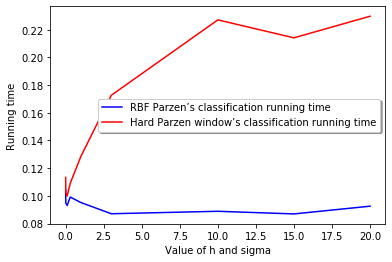

In [51]:
data=split_dataset(iris)
h=[0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]
sigma=[0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]

error=ErrorRate(data[0][:,:-1],data[0][:,-1],data[2][:,:-1],data[2][:,-1])
# error_hard=[error.hard_parzen(i) for i in h]
# error_soft=[error.soft_parzen(i) for i in sigma]
# h_star=np.argmin(error_hard)
# sigma_star=np.argmin(error_soft)

t1_h=np.zeros(len(h))
t2_sigma=np.zeros(len(h))
for i in range(len(h)):
    for j in range(10):
        t1=time.clock()
        error1=error.hard_parzen(h[i])
        t2=time.clock()
        t1_h[i]+=t2-t1
        t3=time.clock()
        error.soft_parzen(h[i])
        t4=time.clock()
        t2_sigma[i]+=t4-t3
    t1_h[i]/=10
    t2_sigma[i]/=10
fig , ax= plt.subplots()
ax.plot(sigma,t2_sigma,'b',label='RBF Parzen’s classification running time')
ax.plot(h,t1_h,'r',label='Hard Parzen window’s classification running time')
ax.legend(loc='center right',shadow=True)
plt.ylabel("Running time")
plt.xlabel("Value of h and sigma")
# plt.savefig('graph3.png')
plt.show()